In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df= pd.read_csv('Shark Tank India.csv')
df.head()

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum().T

Season Number                  0
Episode Number                 0
Episode Title                  0
Pitch Number                   0
Startup Name                   0
Industry                       0
Business Description           0
Company Website                5
Number of Presenters           0
Male Presenters               23
Female Presenters             82
Transgender Presenters       168
Couple Presenters              4
Pitchers Average Age           0
Started in                    52
Pitchers City                 21
Pitchers State                19
Yearly Revenue               107
Monthly Sales                 90
Gross Margin                 129
Original Ask Amount            0
Original Ask Equity            0
Valuation Requested            0
Received Offer                 0
Accepted Offer                59
Total Deal Amount             87
Total Deal Equity             87
Total Deal Debt              157
Valuation Offered             88
Number of sharks in deal      88
Ashneer In

In [8]:
df.shape

(170, 54)

In [14]:
df2= df.copy()
df2.drop(axis=1, columns= ['Amit Investment Amount','Amit Investment Equity','Amit Debt Amount'], inplace= True)

In [20]:
idx= df2[df2['Season Number']==2].index
for ix in idx:
    df2.drop(index= ix, axis=0, inplace=True)

In [130]:
df3= df[df['Season Number']==1].drop(columns= ['Amit Investment Amount','Amit Investment Equity','Amit Debt Amount'])
df3.shape          

(152, 51)

In [21]:
df2.shape

(152, 51)

In [23]:
df2[['Male Presenters','Female Presenters','Transgender Presenters', 'Couple Presenters']]

,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters
0,2.0,1.0,NaN,0.0
1,1.0,NaN,NaN,0.0
2,NaN,1.0,NaN,0.0
3,2.0,NaN,NaN,0.0
4,1.0,3.0,NaN,1.0
...,...,...,...,...
147,2.0,NaN,NaN,0.0
148,1.0,1.0,NaN,1.0
149,1.0,1.0,NaN,0.0
150,2.0,NaN,NaN,0.0


In [33]:
#df2['Transgender Presenters'].isnull().sum()
# number of transgender presenters = 2 and remaining 150 rows are null values

#df2.drop(labels= 'Transgender Presenters', axis=1, inplace= True)
#df2['Couple Presenters'].value_counts()

0.0    116
1.0     32
Name: Couple Presenters, dtype: int64

In [35]:
# Plot showing diversity in presenters:
#sns.countplot(x= ['Male Presenters', 'Female Presenters','Transgender Presenters','Couple Presenters'], data= df2)

There are 92.0 female and 220.0 male presenters.


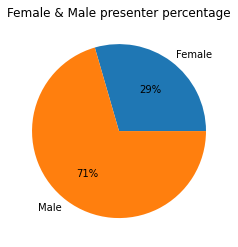

In [56]:
#plot showing number of male and female presenters

fem= df2['Female Presenters'].sum()
mal= df2['Male Presenters'].sum()
print('There are {} female and {} male presenters.'.format(fem,mal))

labels= ['Female', "Male"]
colors= sns.color_palette('pastel')
plt.pie([fem,mal], labels= ['Female', "Male"], autopct= '%.0f%%')
plt.title("Female & Male presenter percentage")
plt.show()


There were 152 pitches made in the show.


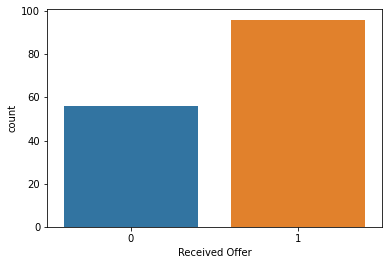

In [65]:
# Offer Analysis

print('There were {} pitches made in the show.'.format(df2['Pitch Number'].count()))
sns.countplot(x= 'Received Offer', data= df2)

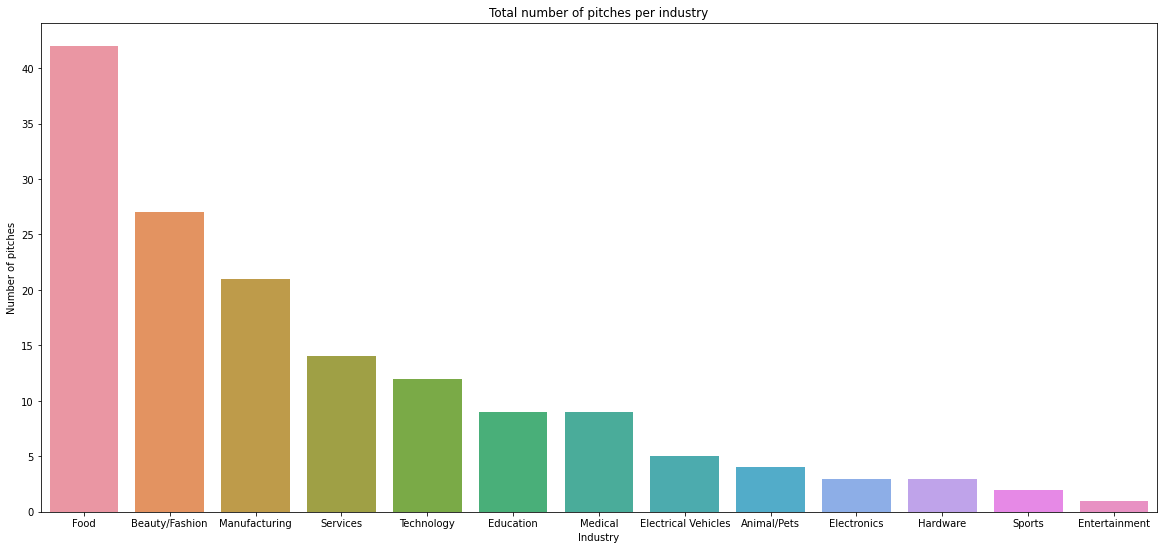

In [133]:
industries= df2['Industry'].value_counts() # number of pitches with respect to industries
plt.figure(figsize=(20,9))
ax= sns.barplot(x=industries.index, y=industries)
# g= ax.bar_label(ax.containers[0])
plt.xticks(rotation= 0)
plt.xlabel("Industry")
plt.ylabel("Number of pitches")
plt.title("Total number of pitches per industry")
plt.show()


## Number of investments made by Each shark

In [98]:
ashneer_investments= df2.loc[(df2['Ashneer Investment Amount'].isnull()== False) & (df2['Ashneer Investment Amount'] != 0)]
print('Ashnner made',len(ashneer_investments),' investments')

aman_investments= df2.loc[(df2['Aman Investment Amount'].isnull()== False) & (df2['Aman Investment Amount'] != 0)]
print('Aman made',len(aman_investments),' investments')

peyush_investments= df2.loc[(df2['Peyush Investment Amount'].isnull()== False) & (df2['Peyush Investment Amount'] != 0)]
print('Peyush made',len(peyush_investments),' investments')

namita_investments= df2.loc[(df2['Namita Investment Amount'].isnull()== False) & (df2['Namita Investment Amount'] != 0)]
print('Namita made',len(namita_investments),' investments')

vineeta_investments= df2.loc[(df2['Vineeta Investment Amount'].isnull()== False) & (df2['Vineeta Investment Amount'] != 0)]
print('Vineeta made',len(vineeta_investments),' investments')

anupam_investments= df2.loc[(df2['Anupam Investment Amount'].isnull()== False) & (df2['Anupam Investment Amount'] != 0)]
print('Anupam made',len(anupam_investments),' investments')

ghazal_investments= df2.loc[(df2['Ghazal Investment Amount'].isnull()== False) & (df2['Ghazal Investment Amount'] != 0)]
print('Ghazal made',len(ghazal_investments),' investments')

Ashnner made 21  investments
Aman made 30  investments
Peyush made 29  investments
Namita made 25  investments
Vineeta made 17  investments
Anupam made 25  investments
Ghazal made 8  investments


In [139]:
# list  comprehension  method

invest_col = [col for col in df2.columns if "Investment" in col] # searching for investment in the column names of df2 amd picking it]


In [169]:
investment_count= df2[invest_col][df2[invest_col] !=0].count() # count number of investment by each shark

In [156]:
# investment_count

In [170]:

# for ix in investment_count.index:
#     first_name = ix.split()[0]
investment_count = pd.DataFrame(investment_count)
investment_count['first_name']= [x.split()[0] for x in investment_count.index]

In [177]:
investment_count.drop_duplicates(subset= 'first_name' , keep= 'last')

,0,first_name
Ashneer Investment Equity,21,Ashneer
Namita Investment Equity,25,Namita
Anupam Investment Equity,25,Anupam
Vineeta Investment Equity,17,Vineeta
Aman Investment Equity,30,Aman
Peyush Investment Equity,29,Peyush
Ghazal Investment Equity,8,Ghazal


In [ ]:
for inv in investment_count,index:
    print('{} investment is {}'.format(inv.split()[0], investment_count.values))

In [137]:
df2.columns

Index(['Season Number', 'Episode Number', 'Episode Title', 'Pitch Number',
       'Startup Name', 'Industry', 'Business Description', 'Company Website',
       'Number of Presenters', 'Male Presenters', 'Female Presenters',
       'Transgender Presenters', 'Couple Presenters', 'Pitchers Average Age',
       'Started in', 'Pitchers City', 'Pitchers State', 'Yearly Revenue',
       'Monthly Sales', 'Gross Margin', 'Original Ask Amount',
       'Original Ask Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Valuation Offered', 'Number of sharks in deal',
       'Ashneer Investment Amount', 'Ashneer Investment Equity',
       'Ashneer Debt Amount', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Anupam Investment Amount', 'Anupam Investment Equity',
       'Anupam Debt Amount', 'Vineeta Investment Amount',
       'Vineeta Investment Equity', 'Vineeta De

In [101]:
#df2.loc[(df2['Ashneer Investment Amount'].isnull()== False) & (df2['Ashneer Investment Amount'] != 0)].count()
#writing function

In [102]:
#def investment_function (name):
 #   df2.loc[(df2['{name} Investment Amount'].isnull()== False) & (df2['{name} Investment Amount'] != 0)]
#print('{name} made',len(namita_investments),' investments')

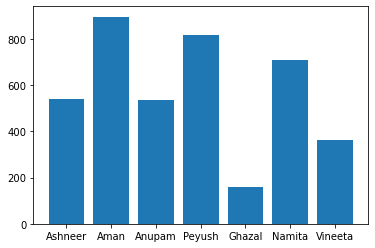

In [113]:
total_amount= [df2['Ashneer Investment Amount'].sum(), df2['Aman Investment Amount'].sum(), 
               df2['Anupam Investment Amount'].sum(), df2['Peyush Investment Amount'].sum(),
               df2['Ghazal Investment Amount'].sum(),
               df2['Namita Investment Amount'].sum(), df2['Vineeta Investment Amount'].sum()]

shark_names = 'Ashneer Aman Anupam Peyush Ghazal Namita Vineeta'.split()

plt.bar(shark_names, total_amount)
plt.show()

In [106]:
shark_names

['Ashneer', 'Aman', 'Anupam', 'Peyush', 'Ghazal', 'Namita', 'Vineeta']

In [185]:
df2.groupby('Industry')['Total Deal Amount'].sum().nlargest(5)

Industry
Food              1066.60005
Beauty/Fashion     661.00000
Manufacturing      525.00000
Education          440.00000
Medical            331.00101
Name: Total Deal Amount, dtype: float64

In [194]:
df2.groupby('Startup Name')['Total Deal Amount'].max()[0]

50.0

In [217]:
inv = df2[['Startup Name','Total Deal Amount']].sort_values(by= 'Total Deal Amount', ascending= False)

In [218]:
inv

,Startup Name,Total Deal Amount
51,AasVidyalaya,150.0
37,Annie,105.0
88,Insurance Samadhan,100.0
18,Raising Superstars,100.0
43,Hammer Lifestyle,100.0
...,...,...
147,Inali Assistive Tech,NaN
148,Meera's Celebrations,NaN
149,Artment,NaN
150,Powertree,NaN


In [224]:
inv['Total Deal Amount'].sum()

4024.60106

In [232]:
# df2[df2['Total Deal Amount']/df2['Total Deal Amount'].sum() >= 0.8]

company_list_80= []
ctr= 0
total_investment= 0
while (total_investment < 0.8 * (inv['Total Deal Amount'].sum())):
    total_investment += inv['Total Deal Amount'].values[ctr]
    
    company_list_80.append(inv['Startup Name'].values[ctr])
    ctr += 1
print(company_list_80)
print(len(company_list_80))
    

['AasVidyalaya', 'Annie', 'Insurance Samadhan', 'Raising Superstars', 'Hammer Lifestyle', 'IN A CAN', 'Get-A-Whey', 'Sunfox Technologies', 'The Yarn Bazaar', 'HumpyA2', 'The Renal Project', 'Revamp Moto', 'Proxgy', 'Skippi Ice Pops', 'RoadBounce', 'Kabaddi Adda', 'Wakao Foods', 'Auli', 'Beyond Water', 'Peeschute', 'BluePine Foods', 'AyuRythm', 'Bummer', 'Tagz Foods', 'Rare Planet', 'WeSTOCK', 'Hair Originals', 'Tweek Labs', 'WitBlox', 'JhaJi Achaar', 'Vivalyf Innovations', 'Carragreen', 'Gold Safe Solutions', 'The Sass Bar', 'PawsIndia', 'Ariro', 'Isak Fragrances', 'Beyond Snack', 'Menstrupedia', 'Namhya Foods', 'ARRCOAT Surface Textures', 'Find Your Kicks India', 'CosIQ']
43


In [209]:
df2['Total Deal Amount']

0      75.0
1      40.0
2      25.0
3      70.0
4       NaN
       ... 
147     NaN
148     NaN
149     NaN
150     NaN
151     NaN
Name: Total Deal Amount, Length: 152, dtype: float64